# UNIDAD 3 - PROYECTO: ML

## Nombre del alumno: Jessamy Alejandra Amaya Gil
## Número de control: 18120137

# PRESENTACIÓN DEL PROYECTO:
## El proyecto busca que el estudiante pueda utilizar técnicas de Machine Learning para realizar predicciones de un dataset de la vida real.
## En esta ocasión, el dataset es pequeño, por lo que se debe tener especial cuidado cuando se traten los datos y se seleccione el modelo.

# PARTE I: EDA.

## Paso 1. Carga y muestra.
### - Cargue el dataset llamado "cirrhosis.csv" en un dataframe, posteriormente muestre su información.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as amano
import numpy as np

In [6]:
data = pd.read_csv('cirrhosis.csv', delimiter=',')
num_filas, num_columnas = data.shape
info_columnas = data.dtypes

print(f"Cantidad de filas: {num_filas}")
print(f"Cantidad de columnas: {num_columnas}")
print("Tipos de datos de las columnas:")
print(info_columnas)
print(data)

Cantidad de filas: 418
Cantidad de columnas: 20
Tipos de datos de las columnas:
ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object
      ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly  \
0      1     400      D  D-penicillamine  21464   F       Y            Y   
1      2    4500      C  D-penicillamine  20617   F       N            Y   
2      3    1012      D  D-penicillamine  25594   M       N            N   
3      4    1925      D  D-penicillamine  19994   F       N            Y   
4      5    1504     CL   

## Paso 2. Análisis estadístico.
### - De las columnas numéricas, muestre la información estadística relevante (promedio, cuartíles, desviación estándar y coeficiente de variación).
### - A través del coeficiente de variación determine qué columnas presentan mucha dispersión en sus datos.


In [14]:
# Seleccionar solo las columnas numéricas
columnas_numericas = df.select_dtypes(include=[np.number])

# Mostrar información estadística relevante
estadisticas_relevantes = columnas_numericas.describe()

# Calcular el coeficiente de variación
coef_variacion = columnas_numericas.apply(lambda x: np.std(x) / np.mean(x) * 100)

# Mostrar información estadística relevante
print("Información estadística relevante:")
print(estadisticas_relevantes)

# Mostrar el coeficiente de variación
print("\nCoeficiente de variación:")
print(coef_variacion)

# Identificar columnas con mucha dispersión (coeficiente de variación alto)
columnas_dispersion_alta = coef_variacion[coef_variacion > 30].index
print("\nColumnas con mucha dispersión:")
print(columnas_dispersion_alta)

Información estadística relevante:
               ID      N_Days      Status         Age   Bilirubin  \
count  418.000000  418.000000  418.000000  418.000000  418.000000   
mean     5.059344    7.316108    0.464606    9.805381    1.125921   
std      0.941925    0.835675    0.527655    0.212813    0.708078   
min      0.693147    3.737670    0.000000    9.169414    0.262364   
25%      4.665787    6.997367    0.000000    9.657937    0.587787   
50%      5.349483    7.456450    0.000000    9.832475    0.875469   
75%      5.751778    7.868828    1.098612    9.965217    1.481605   
max      6.037871    8.475538    1.098612   10.262944    3.367296   

       Cholesterol     Albumin      Copper    Alk_Phos        SGOT  \
count   284.000000  418.000000  310.000000  312.000000  312.000000   
mean      5.800504    1.498843    4.279436    7.272987    4.719623   
std       0.435361    0.097994    0.807743    0.721760    0.443704   
min       4.795791    1.085189    1.609438    5.669881    3.308

## Paso 3. Búsqueda de nulos y datos atípicos.
### - Muestre cuántos datos nulos tienen las columnas, puede apoyarse de un gráfico para mostrar la cantidad de nulos que hay.
### - Muestre las distribuciones de las columnas numéricas y mencione si presentan datos atípicos/anomalías/outliers.


Cantidad de datos nulos por columna:
ID                   0
N_Days               0
Status               0
Drug                 0
Age                  0
Sex                  0
Ascites              0
Hepatomegaly         0
Spiders              0
Edema                0
Bilirubin            0
Cholesterol        134
Albumin              0
Copper             108
Alk_Phos           106
SGOT               106
Tryglicerides      136
Platelets           11
Prothrombin          2
Stage                6
Status_numerico      0
dtype: int64


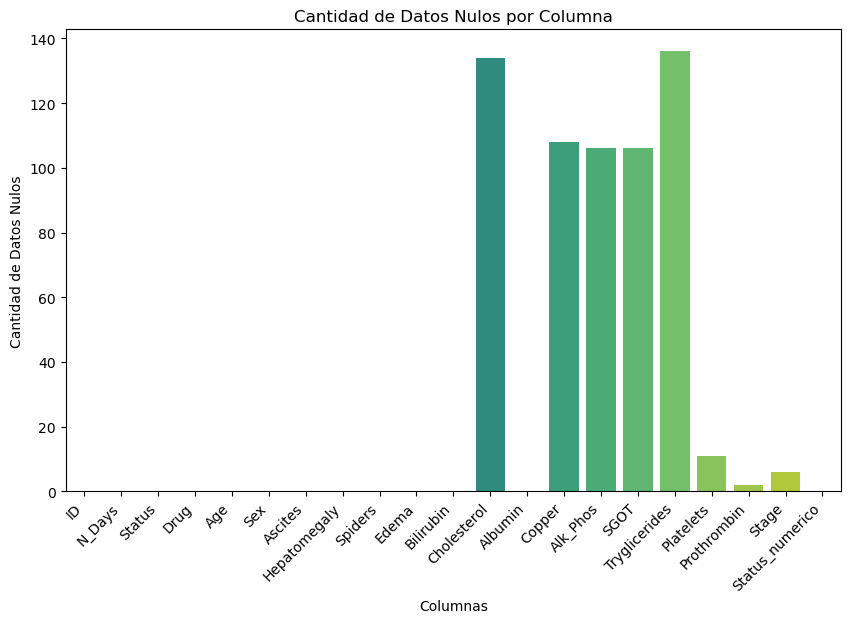

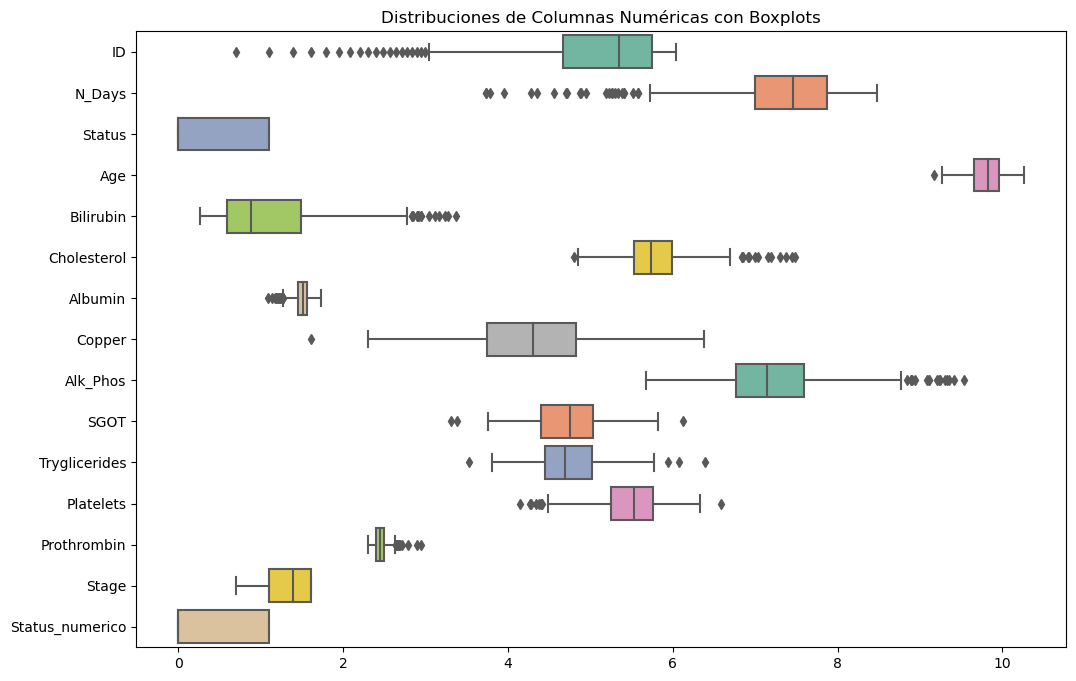

In [15]:
# Mostrar la cantidad de datos nulos en cada columna
datos_nulos = df.isnull().sum()
print("Cantidad de datos nulos por columna:")
print(datos_nulos)

# Gráfico de barras para visualizar los datos nulos
plt.figure(figsize=(10, 6))
sns.barplot(x=datos_nulos.index, y=datos_nulos.values, palette="viridis")
plt.title("Cantidad de Datos Nulos por Columna")
plt.xlabel("Columnas")
plt.ylabel("Cantidad de Datos Nulos")
plt.xticks(rotation=45, ha="right")
plt.show()

# Mostrar las distribuciones y detectar outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=[np.number]), orient="h", palette="Set2")
plt.title("Distribuciones de Columnas Numéricas con Boxplots")
plt.show()

## Paso 4. Análisis de categorización.
### - Revise las columnas que son de tipo objeto, analice la cantidad de posibilidades que tienen.
### - Determine si una (o algunas) puede ser categorizable, aún no la(s) categorice.

In [16]:
columnas_objeto = df.select_dtypes(include=['object']).columns

for columna in columnas_objeto:
    unique_values = df[columna].unique()
    print(f"{columna}: {len(unique_values)} posibilidades únicas")
    print(unique_values)
    print()
    
umbral_categorizacion = 10

columnas_categorizables = [columna for columna in columnas_objeto if len(df[columna].unique()) < umbral_categorizacion]

print('\nColumnas categorizables:')
print(columnas_categorizables)

Drug: 2 posibilidades únicas
['D-penicillamine' 'Placebo']

Sex: 2 posibilidades únicas
['F' 'M']

Ascites: 2 posibilidades únicas
['Y' 'N']

Hepatomegaly: 2 posibilidades únicas
['Y' 'N']

Spiders: 2 posibilidades únicas
['Y' 'N']

Edema: 3 posibilidades únicas
['Y' 'N' 'S']


Columnas categorizables:
['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']


## Paso 5. Correlación y análisis del problema.
### - Muestre la correlación de los datos numéricos con respecto a la columna "Status", para ello tendrá que volver numérica dicha columna (para este paso puede usar un encoder).
### - El objetivo es predecir con estos datos la variable "Status".
### - ¿Con los datos que se tienen se puede predecir correctamente esa variable?
### - Si tuviera que seleccionar un modelo para hacer las predicciones, ¿cuál sería?

C:\Users\jessa\AppData\Local\Temp\ipykernel_14628\4017393653.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


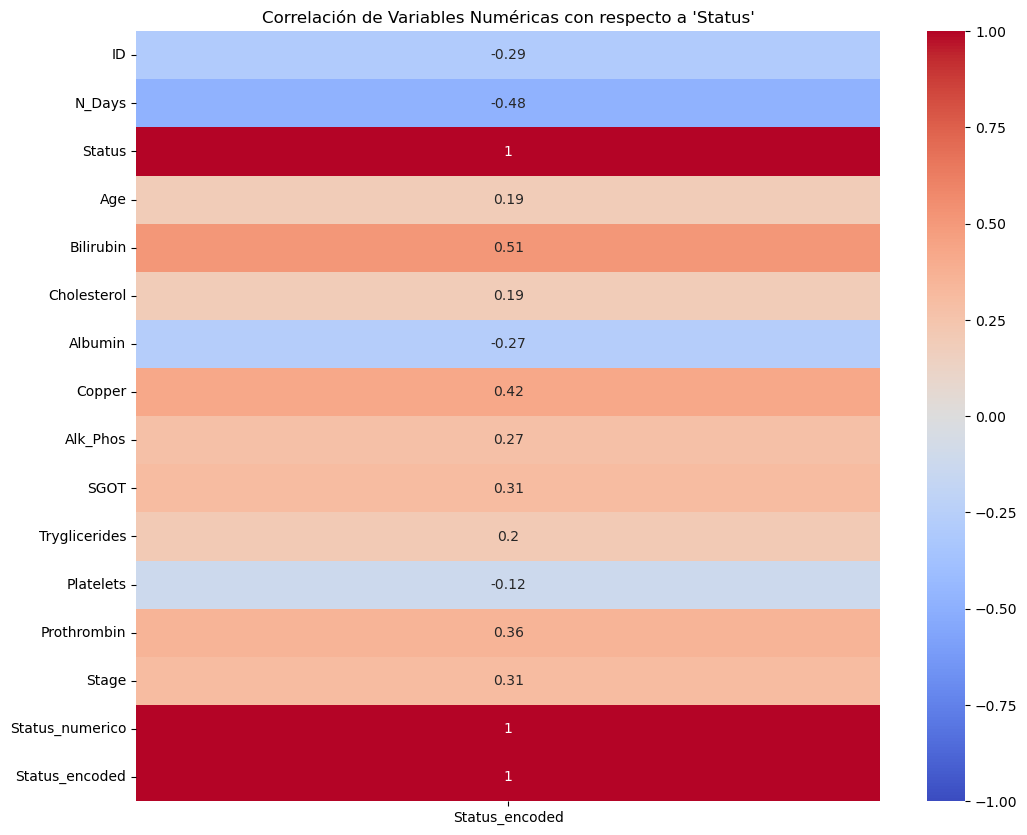

In [19]:
from sklearn.preprocessing import LabelEncoder
# Paso 1: Codificar la columna "Status"
le = LabelEncoder()
df['Status_encoded'] = le.fit_transform(df['Status'])

# Paso 2: Calcular la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['Status_encoded']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlación de Variables Numéricas con respecto a 'Status'")
plt.show()

# PARTE II: MANIPULACIÓN Y TRATAMIENTO.

## Paso 1. Tratamiento de datos nulos.
### - Trate los datos nulos acorde a lo que se ha visto previamente en el curso.
### - Muestre la cantidad de datos nulos antes y después del tratamiento.

In [18]:
# Mostrar la cantidad de datos nulos antes del tratamiento
print("Cantidad de datos nulos antes del tratamiento:")
print(df.isnull().sum())

# Tratar los datos nulosse utiliza el método fillna() para rellenar los datos nulos con la media de cada columna
df_tratado = df.fillna(df.mean())

# Mostrar la cantidad de datos nulos después del tratamiento
print("\nCantidad de datos nulos después del tratamiento:")
print(df_tratado.isnull().sum())

Cantidad de datos nulos antes del tratamiento:
ID                   0
N_Days               0
Status               0
Drug                 0
Age                  0
Sex                  0
Ascites              0
Hepatomegaly         0
Spiders              0
Edema                0
Bilirubin            0
Cholesterol        134
Albumin              0
Copper             108
Alk_Phos           106
SGOT               106
Tryglicerides      136
Platelets           11
Prothrombin          2
Stage                6
Status_numerico      0
Status_encoded       0
dtype: int64

Cantidad de datos nulos después del tratamiento:
ID                 0
N_Days             0
Status             0
Drug               0
Age                0
Sex                0
Ascites            0
Hepatomegaly       0
Spiders            0
Edema              0
Bilirubin          0
Cholesterol        0
Albumin            0
Copper             0
Alk_Phos           0
SGOT               0
Tryglicerides      0
Platelets          0
Prothr

C:\Users\jessa\AppData\Local\Temp\ipykernel_14628\2871379476.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_tratado = df.fillna(df.mean())


## Paso 2. Tratamiento de anomalías.
### - Enfrente los datos extremos y las anomalías.
### - Es libre de utilizar los métodos que prefiera, trate de no perder muchos datos (se tiene un dataset pequeño).
### - Muestre las distribuciones tratadas antes y después del tratamiento.

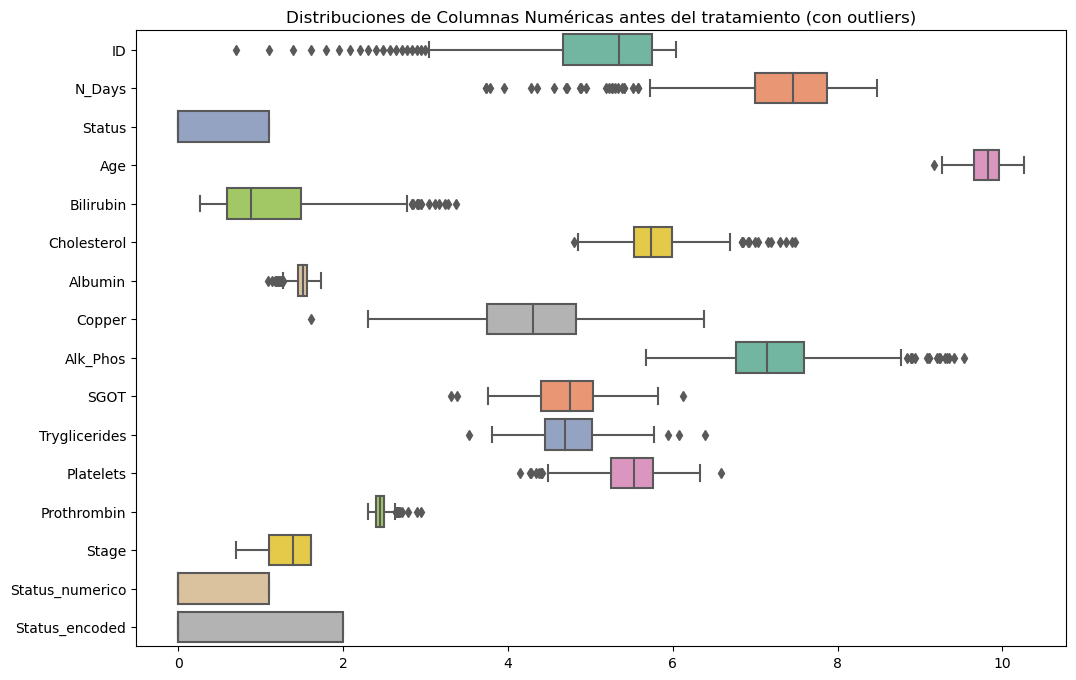

NameError: name 'winsorize' is not defined

In [20]:
# Muestre las distribuciones antes del tratamiento
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=[np.number]), orient="h", palette="Set2")
plt.title("Distribuciones de Columnas Numéricas antes del tratamiento (con outliers)")
plt.show()

# Tratar datos extremos mediante winsorizing
df_tratado = df.copy()

# Definir un porcentaje de datos a winsorizar (por ejemplo, el 5%)
porcentaje_winsorizing = 0.05

for columna in df_tratado.select_dtypes(include=[np.number]).columns:
    df_tratado[columna] = winsorize(df_tratado[columna], limits=[porcentaje_winsorizing, porcentaje_winsorizing])

# Muestre las distribuciones después del tratamiento
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_tratado.select_dtypes(include=[np.number]), orient="h", palette="Set2")
plt.title("Distribuciones de Columnas Numéricas después del tratamiento (sin outliers)")
plt.show()

## Paso 3. Categorización.
### - Seleccione las columnas de tipo objeto candidatas a la categorización.
### - Realice la categorización.
### - Muestre la información del dataframe para demostrar que se realizó con éxito.

In [21]:
# Seleccionar columnas de tipo objeto
columnas_objeto = df.select_dtypes(include='object')

# Mostrar la información antes de la categorización
print("Información del DataFrame antes de la categorización:")
print(df.info())

# Categorizar las columnas de tipo objeto
for columna in columnas_objeto.columns:
    df[columna] = df[columna].astype('category')

# Mostrar la información después de la categorización
print("\nInformación del DataFrame después de la categorización:")
print(df.info())

Información del DataFrame antes de la categorización:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               418 non-null    float64
 1   N_Days           418 non-null    float64
 2   Status           418 non-null    float64
 3   Drug             418 non-null    object 
 4   Age              418 non-null    float64
 5   Sex              418 non-null    object 
 6   Ascites          418 non-null    object 
 7   Hepatomegaly     418 non-null    object 
 8   Spiders          418 non-null    object 
 9   Edema            418 non-null    object 
 10  Bilirubin        418 non-null    float64
 11  Cholesterol      284 non-null    float64
 12  Albumin          418 non-null    float64
 13  Copper           310 non-null    float64
 14  Alk_Phos         312 non-null    float64
 15  SGOT             312 non-null    float64
 16  Tryglice

## Paso 4. Tratamiento de incosistencias.
### - En la categorización anterior, ¿hay inconsistencias?
### - Revise las posibles opciones de cada columna categorizada, si encuentra alguna inconsistencia hay que tratarla.
### - Puede emplear gráficas de conteos para validar si una categoría se podría considerar como inconsistente.

Columna: Drug
D-penicillamine    264
Placebo            154
Name: Drug, dtype: int64




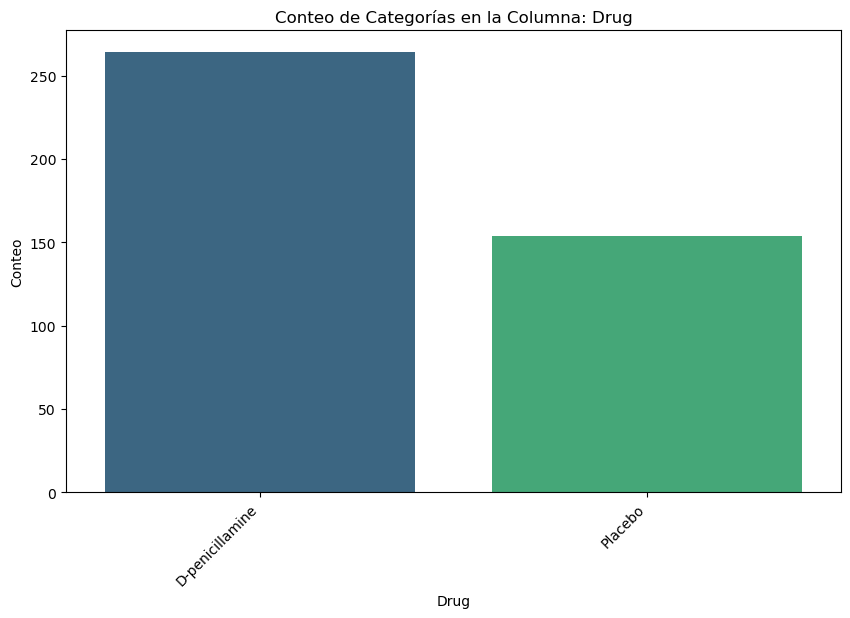

Columna: Sex
F    374
M     44
Name: Sex, dtype: int64




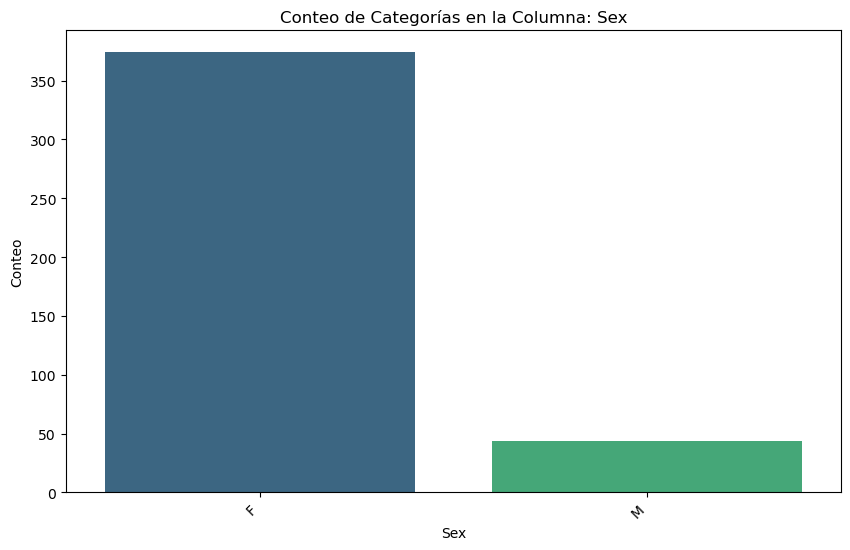

Columna: Ascites
N    394
Y     24
Name: Ascites, dtype: int64




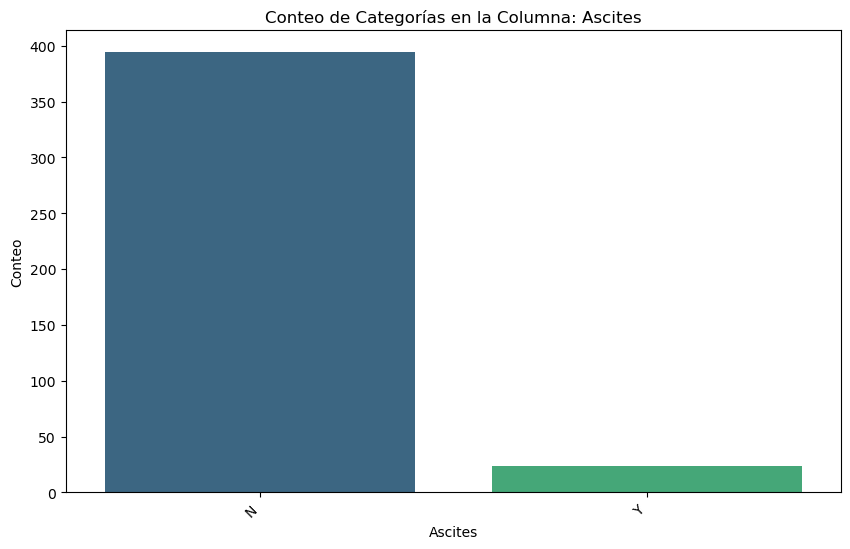

Columna: Hepatomegaly
Y    266
N    152
Name: Hepatomegaly, dtype: int64




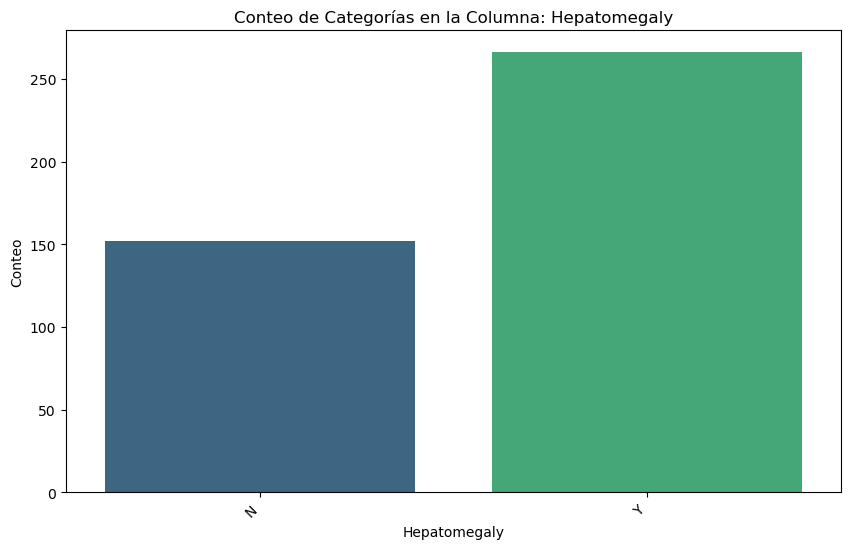

Columna: Spiders
N    328
Y     90
Name: Spiders, dtype: int64




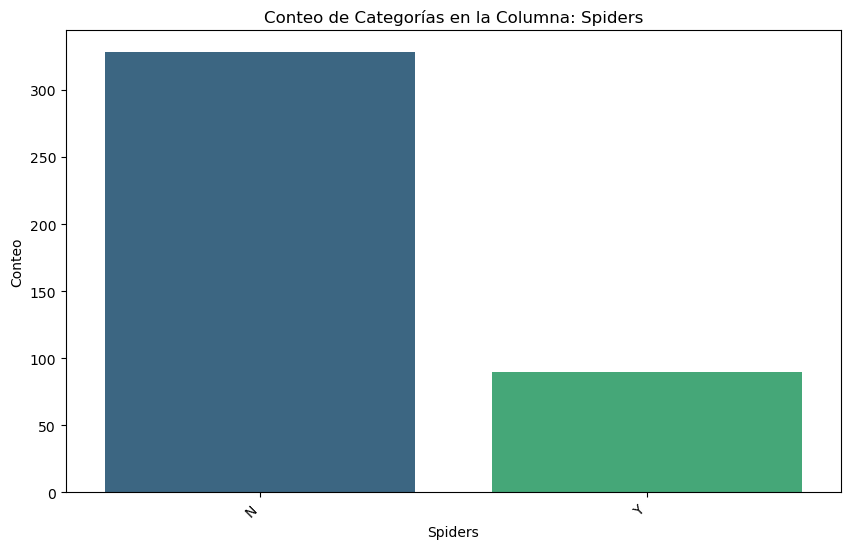

Columna: Edema
N    354
S     44
Y     20
Name: Edema, dtype: int64




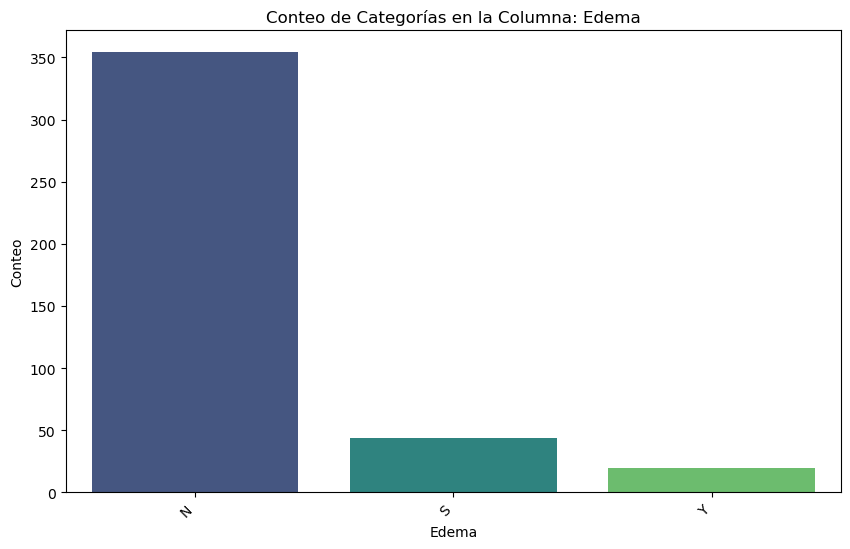

In [22]:
# Seleccionar columnas de tipo objeto
columnas_objeto = df.select_dtypes(include='category')

# Visualizar las posibles opciones en cada columna
for columna in columnas_objeto.columns:
    print(f"Columna: {columna}")
    print(df[columna].value_counts())
    print("\n")

    # Gráfico de conteos para validar inconsistencias
    plt.figure(figsize=(10, 6))
    sns.countplot(x=columna, data=df, palette="viridis")
    plt.title(f"Conteo de Categorías en la Columna: {columna}")
    plt.xlabel(columna)
    plt.ylabel("Conteo")
    plt.xticks(rotation=45, ha="right")
    plt.show()

## Paso 5. Conversión a numérico.
### - Ya que tiene un dataframe sin datos nulos, sin inconsistencias y sin anomalías, hay que convertirlo a numérico.
### - Emplee un tipo de encoding adecuado a cada columna.
### - Construya un nuevo dataframe completamente numérico (incluyendo "Status", este debe ser forzosamente mediante LabelEncoding).
### - Muestre la información del nuevo dataframe.

In [23]:
# Supongamos que las columnas a tratar son todas las columnas de tipo 'category'
columnas_categoricas = df.select_dtypes(include='category').columns

# Crear un nuevo dataframe copiando el original
df_numeric = df.copy()

# Aplicar LabelEncoder a la columna 'Status'
label_encoder = LabelEncoder()
df_numeric['Status'] = label_encoder.fit_transform(df['Status'])

# Aplicar One-Hot Encoding (get_dummies) a las columnas categóricas
df_numeric = pd.get_dummies(df_numeric, columns=columnas_categoricas)

# Mostrar información del nuevo dataframe
print("Información del nuevo dataframe numérico:")
print(df_numeric.info())

Información del nuevo dataframe numérico:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    418 non-null    float64
 1   N_Days                418 non-null    float64
 2   Status                418 non-null    int64  
 3   Age                   418 non-null    float64
 4   Bilirubin             418 non-null    float64
 5   Cholesterol           284 non-null    float64
 6   Albumin               418 non-null    float64
 7   Copper                310 non-null    float64
 8   Alk_Phos              312 non-null    float64
 9   SGOT                  312 non-null    float64
 10  Tryglicerides         282 non-null    float64
 11  Platelets             407 non-null    float64
 12  Prothrombin           416 non-null    float64
 13  Stage                 412 non-null    float64
 14  Status_numerico       418 non-nu

# PARTE III: MACHINE LEARNING.

In [26]:
## Paso 1. División de los datos.
### - Divide las columnas en la variable "X" y la variable "y".
### - Muestree los datos en dos: entrenamiento y pruebas. La proporción de cada muestra queda a decisión suya.
### - Utilice una semilla para que los resultados puedan ser reproducibles.

In [38]:
from sklearn.model_selection import train_test_split

# Supongamos que las columnas a incluir en X son todas las columnas excepto "Status"
X = df.drop(columns=['Status'])

# La variable objetivo "y" será la columna "Status"
y = df['Status']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar información sobre las dimensiones de los conjuntos
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (334, 19)
Dimensiones de X_test: (84, 19)
Dimensiones de y_train: (334,)
Dimensiones de y_test: (84,)


## Paso 2. Abordaje mediante modelo simple.
### - Importe un modelo simple de ML, puede ser KNN, Regresión Logística o un árbol de decisión.
### - Entrene el modelo con los datos y realice las predicciones con la muestra de pruebas.
### - Muestre los resultados con f1_score, accuracy_score y classification_report.
### - Analizando el reporte de clasificación, ¿qué tal se desempeñó su modelo?

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Cargar el dataset en un dataframe
df = pd.read_csv('cirrhosis.csv')

# Supongamos que las columnas a incluir en X son todas las columnas excepto "Status"
X = df.drop(columns=['Status'])

# La variable objetivo "y" será la columna "Status"
y = df['Status']

# Dividir los datos en conjuntos de entrenamiento y prueba
# Utilizaremos una proporción de 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir las transformaciones para las columnas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar las transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Crear y entrenar el modelo de Regresión Logística con el preprocesamiento
modelo_logistico = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', LogisticRegression(random_state=42))])

modelo_logistico.fit(X_train, y_train)

# Realizar predicciones con la muestra de prueba
predicciones = modelo_logistico.predict(X_test)

# Evaluar el rendimiento del modelo
f1 = f1_score(y_test, predicciones, average='weighted')  # Cambiado a 'weighted'
accuracy = accuracy_score(y_test, predicciones)
reporte_clasificacion = classification_report(y_test, predicciones)

# Mostrar los resultados
print(f"F1 Score: {f1}")
print(f"Accuracy Score: {accuracy}")
print("Classification Report:")
print(reporte_clasificacion)

F1 Score: 0.8126293995859213
Accuracy Score: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

           C       0.83      0.91      0.87        44
          CL       0.00      0.00      0.00         4
           D       0.83      0.83      0.83        36

    accuracy                           0.83        84
   macro avg       0.56      0.58      0.57        84
weighted avg       0.79      0.83      0.81        84



C:\Users\jessa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jessa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jessa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Paso 3. Mejorando el modelo.
### - Emplee GridSearchCV para encontrar los mejores hiperparámetros para su modelo.
### - Valide con varias opciones.
### - Si su modelo no logra mejorar mucho, no se preocupe, es parte del aprendizaje.

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score


# Supongamos que las columnas a incluir en X son todas las columnas excepto "Status"
X = df.drop(columns=['Status'])

# La variable objetivo "y" será la columna "Status"
y = df['Status']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir las transformaciones para las columnas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar las transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Crear el modelo de Regresión Logística
modelo_logistico = LogisticRegression(random_state=42)

# Crear el pipeline con preprocesamiento y modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', modelo_logistico)])

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'classifier__penalty': ['l1', 'l2']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=make_scorer(f1_score, average='weighted'))

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluar el rendimiento del modelo con los mejores hiperparámetros en la muestra de prueba
mejor_modelo = grid_search.best_estimator_
predicciones_mejor_modelo = mejor_modelo.predict(X_test)

f1_mejor_modelo = f1_score(y_test, predicciones_mejor_modelo, average='weighted')
accuracy_mejor_modelo = accuracy_score(y_test, predicciones_mejor_modelo)
reporte_clasificacion_mejor_modelo = classification_report(y_test, predicciones_mejor_modelo)

# Mostrar los resultados con el mejor modelo
print("\nRendimiento del modelo con mejores hiperparámetros:")
print(f"F1 Score: {f1_mejor_modelo}")
print(f"Accuracy Score: {accuracy_mejor_modelo}")
print("Classification Report:")
print(reporte_clasificacion_mejor_modelo)

C:\Users\jessa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jessa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Mejores hiperparámetros encontrados:
{'classifier__C': 0.1, 'classifier__penalty': 'l2'}

Rendimiento del modelo con mejores hiperparámetros:
F1 Score: 0.8126293995859213
Accuracy Score: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

           C       0.83      0.91      0.87        44
          CL       0.00      0.00      0.00         4
           D       0.83      0.83      0.83        36

    accuracy                           0.83        84
   macro avg       0.56      0.58      0.57        84
weighted avg       0.79      0.83      0.81        84



C:\Users\jessa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jessa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jessa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Paso 4. Ensambles.
### - Utilice el ensamble de VotingClassifier para mejorar el rendimiento.
### - Seleccione al menos 4 modelos simples diferentes y úselos dentro del ensamble (Stacking).
### - Entrene el meta-modelo y valide su rendimiento con f1_score, accuracy_score y classification_report.
### - Analizando el classification_report, ¿qué tal se desempeñó el modelo?


In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Cargar el dataset en un dataframe
df = pd.read_csv('cirrhosis.csv')

# Supongamos que las columnas a incluir en X son todas las columnas excepto "Status"
X = df.drop(columns=['Status'])

# La variable objetivo "y" será la columna "Status"
y = df['Status']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir las transformaciones para las columnas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar las transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Crear modelos individuales
logistic_model = LogisticRegression(random_state=42)
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)

# Crear ensamble de VotingClassifier
voting_model = VotingClassifier(
    estimators=[
        ('logistic', logistic_model),
        ('knn', knn_model),
        ('tree', tree_model),
        ('svm', svm_model)
    ],
    voting='soft'
)

# Crear el pipeline con preprocesamiento y ensamble
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', voting_model)])

# Entrenar el modelo
model_pipeline.fit(X_train, y_train)

# Realizar predicciones con el modelo
predicciones = model_pipeline.predict(X_test)

# Evaluar el rendimiento del modelo
f1 = f1_score(y_test, predicciones, average='weighted')
accuracy = accuracy_score(y_test, predicciones)
reporte_clasificacion = classification_report(y_test, predicciones)

# Mostrar los resultados
print("Rendimiento del modelo:")
print(f"F1 Score: {f1}")
print(f"Accuracy Score: {accuracy}")
print("Classification Report:")
print(reporte_clasificacion)

C:\Users\jessa\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\jessa\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


Rendimiento del modelo:
F1 Score: 0.824484061274668
Accuracy Score: 0.8452380952380952
Classification Report:
              precision    recall  f1-score   support

           C       0.85      0.91      0.88        44
          CL       0.00      0.00      0.00         4
           D       0.84      0.86      0.85        36

    accuracy                           0.85        84
   macro avg       0.56      0.59      0.58        84
weighted avg       0.80      0.85      0.82        84



C:\Users\jessa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jessa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jessa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Paso 5. Modelo supremo.
### - Con los resultados del paso 4 y 5, determine qué camino seguirá: tomar un modelo y mejorarlo o usar el meta-modelo y mejorarlo.
### - Mejore su modelo hasta el máximo, para eso se recomienda utilizar una Pipeline (puede ser con Pipeline o make_pipeline).
### - Dependiendo del modelo que haya seleccionado, debe buscar mejores hiperparámetros, escalar, normalizar, estandarizar o hacer cambios importantes en los datos (como seleccionar únicamente las variables de mayor correlación), también puede emplear PCA para reducir dimensionalidad.
### - El objetivo es que el modelo generado en este paso sea superior a los modelos del paso 4 y 5.
### - Para este paso también puede utilizar las SVM, RandomForest y Redes Neuronales Artificiales (SKLearn).

In [36]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Supongamos que las columnas a incluir en X son todas las columnas excepto "Status"
X = df.drop(columns=['Status'])

# La variable objetivo "y" será la columna "Status"
y = df['Status']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir las transformaciones para las columnas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar las transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Crear un pipeline con reducción de dimensionalidad (PCA) y RandomForestClassifier
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Definir los hiperparámetros a ajustar
param_grid = {
    'preprocessor_numimputer_strategy': ['mean', 'median'],
    'pca__n_components': [5, 10, 15],  # Ajusta la cantidad de componentes principales para PCA
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Configurar la búsqueda de hiperparámetros
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='f1_weighted')

# Entrenar el modelo con búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y realizar predicciones
best_model = grid_search.best_estimator_
predicciones = best_model.predict(X_test)

# Evaluar el rendimiento del mejor modelo
f1 = f1_score(y_test, predicciones, average='weighted')
accuracy = accuracy_score(y_test, predicciones)
reporte_clasificacion = classification_report(y_test, predicciones)

# Mostrar los resultados
print("Mejor rendimiento del modelo:")
print(f"F1 Score: {f1}")
print(f"Accuracy Score: {accuracy}")
print("Classification Report:")
print(reporte_clasificacion)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
print(grid_search.best_params_)

ValueError: Invalid parameter 'preprocessor_numimputer_strategy' for estimator Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['ID', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object'))])),
                ('pca', PCA()),
                ('classifier', RandomForestClassifier(random_state=42))]). Valid parameters are: ['memory', 'steps', 'verbose'].

# PARTE IV. PRESENTACIÓN.
## - Emplee PCA con las columnas de la variable X (con los datos completos) y reduzca su dimensionalidad a 2.
## - Muestre un gráfico de dispersión entre esas dos características PCA y colorice con la columna "Status". Para esto puede construir un nuevo dataframe con las 2 columnas obtenidas por PCA y añadiendo la columna "Status" antes de la transformación.
## - Analice si los grupos se pueden separar dentro de ese gráfico.
## - Suba este proyecto a su propio repositorio en GitHub.
## - Documente en un README el proceso realizado en este proyecto.
## - Brinde el enlace al entregar el proyecto en Teams.


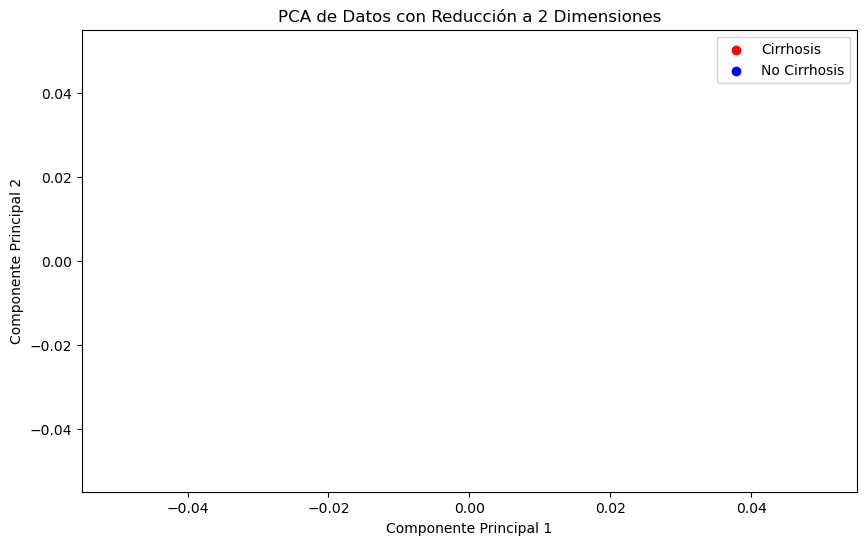

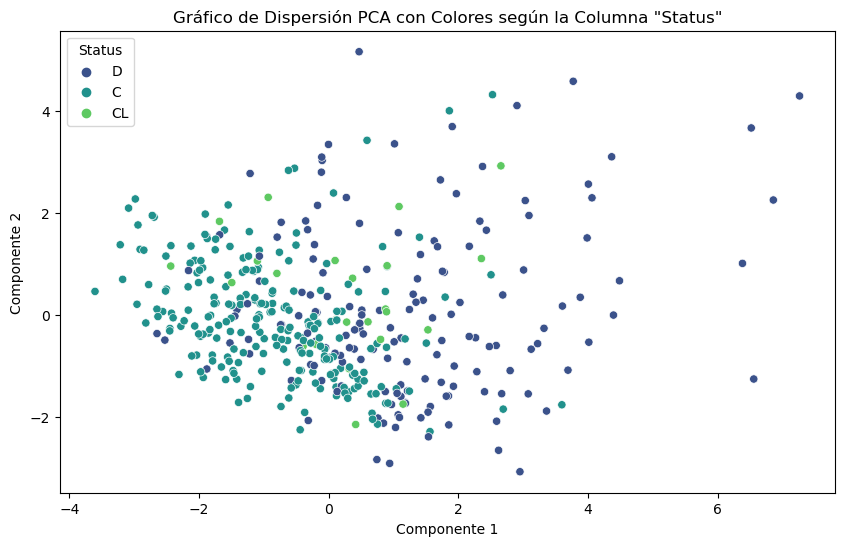

In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Supongamos que ya tienes tus datos X completos
# Puedes utilizar el preprocesador que ya definiste anteriormente
X_preprocessed = preprocessor.fit_transform(X)

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

# Crear un DataFrame con los resultados de PCA
pca_df = pd.DataFrame(data=X_pca, columns=['Componente 1', 'Componente 2'])

# Concatenar las etiquetas de la variable objetivo 'y'
pca_df['Status'] = y.values

# Visualizar el resultado en un scatter plot
plt.figure(figsize=(10, 6))
status_labels = ['Cirrhosis', 'No Cirrhosis']
colors = ['red', 'blue']

for status, color in zip(status_labels, colors):
    subset = pca_df[pca_df['Status'] == status]
    plt.scatter(subset['Componente 1'], subset['Componente 2'], label=status, color=color)

plt.title('PCA de Datos con Reducción a 2 Dimensiones')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

# Visualizar el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Componente 1', y='Componente 2', hue='Status', data=pca_df, palette='viridis')
plt.title('Gráfico de Dispersión PCA con Colores según la Columna "Status"')
plt.show()